# GAME OF THRONES Death Prediction

## EDA

This sript will retrieve information from the .csv file saved on step 1 ([Load&Clean data](01_LoadClean_data.ipynb)) and perform a general EDA (Exploratory Data Analysis) on the data, both books and books+show information, to take a clearer picture of the variables we'll be dealing with.

If step 0 ([Load&Clean data](01_LoadClean_data.ipynb)) has already been executed **once** it will not be necessary to execute it again and you can start from here.

In [69]:
#Library Section
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import decomposition
from mpl_toolkits.mplot3d import Axes3D
from collections import Counter

### Analysis on INNER JOIN
**Characters that appear both in the Book and in the Tv Show**

In [70]:
got_df = pd.read_csv('../csv/SQLINNER_GOT_data.csv')
len(got_df)

115

Populating the interactive namespace from numpy and matplotlib


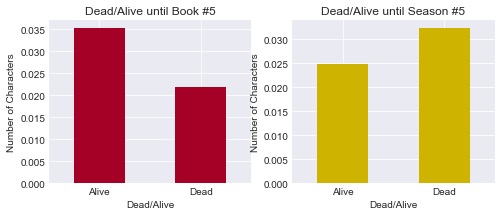

In [71]:
%pylab inline
# General distribution Dead?Alive by books and tv SHow separately

sns.set_style("dark")
plt.figure(figsize=(8,3))

plt.subplot(1, 2, 1)
bars_bk = got_df.groupby('isdead_bk')['isdead_bk'].count()/total
bars_bk.plot(kind="bar", colormap='RdYlBu')

plt.title('Dead/Alive until Book #5', fontsize=12)
plt.xlabel('Dead/Alive', fontsize=10)
plt.ylabel('Number of Characters', fontsize=10)
plt.xticks(range(0,2), ['Alive', 'Dead'], rotation=0)
plt.grid()

plt.subplot(1, 2, 2)
bars_shw = got_df.groupby('isdead_shw')['isdead_shw'].count()/total
bars_shw.plot(kind="bar", color='xkcd:mustard')

plt.title('Dead/Alive until Season #5', fontsize=12)
plt.xlabel('Dead/Alive', fontsize=10)
plt.ylabel('Number of Characters', fontsize=10)
plt.xticks(range(0,2), ['Alive', 'Dead'], rotation=0)
plt.grid()

#plt.savefig('EDA_Bar_DeadAlive.png')

In [72]:
print(got_df.groupby('isdead_shw')['isdead_shw'].count())
print(got_df.groupby('isdead_shw')['isdead_shw'].count()/total)

isdead_shw
0    50
1    65
Name: isdead_shw, dtype: int64
isdead_shw
0    0.024863
1    0.032322
Name: isdead_shw, dtype: float64


Populating the interactive namespace from numpy and matplotlib


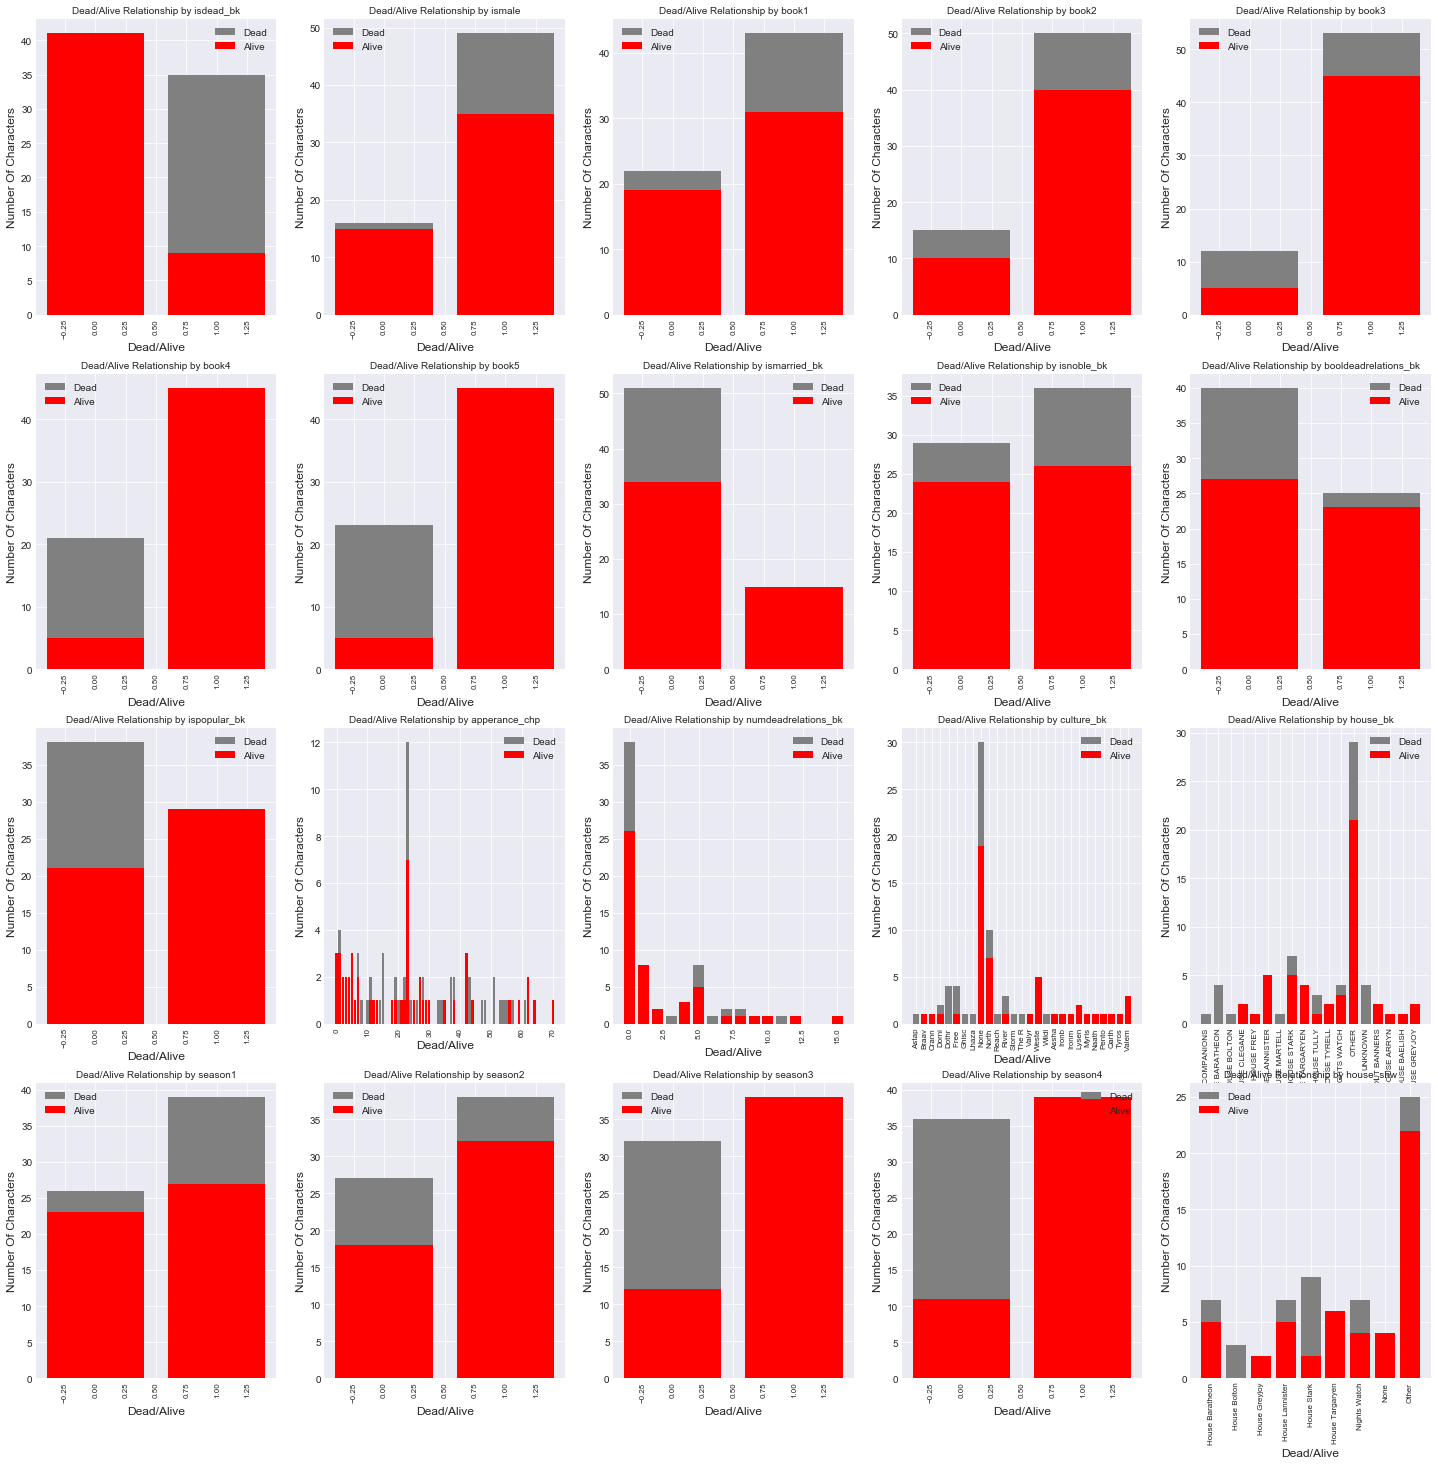

In [73]:
%pylab inline
# Dead/Alive characters by each of the main independent variables

plt.figure(figsize=(25,25))
#eda_columns = ['male', 'culture', 'book1', 'ismarried', 'isnoble', 'booldeadrelations', 'ispopular']
eda_columns = ['isdead_bk', 'ismale', 'book1', 'book2', 'book3', 'book4', 'book5',
               'ismarried_bk', 'isnoble_bk', 'booldeadrelations_bk', 'ispopular_bk', 'apperance_chp',
               'numdeadrelations_bk', 'culture_bk', 'house_bk', 'season1', 'season2', 'season3', 'season4', 
               'house_shw']

#plt.subplot(3, 4, 1)
pos = 1
for i in eda_columns :
    plt.subplot(4, 5, pos)
    
    bars = got_df.groupby([i, 'isdead_shw'])['name_x'].count().reset_index()
    dead = bars[bars.isdead_shw == 1][[i, 'name_x']]
    plt.bar(dead[i], dead['name_x'], label='Dead', color='grey')
    alive = bars[bars.isdead_shw == 0][[i, 'name_x']]
    plt.bar(alive[i], alive['name_x'], label='Alive', color='red')
    plt.xticks(rotation=90, fontsize=8)

    plt.title('Dead/Alive Relationship by '+i, fontsize=10)
    plt.xlabel('Dead/Alive', fontsize=12)
    plt.ylabel('Number Of Characters', fontsize=12)
    plt.grid()
    plt.legend(fontsize=10)
    pos += 1

#plt.savefig('EDA_Bar_FullFeatures.png')

In [74]:
by_book = got_df.groupby('death_bk')['isdead_shw'].count().reset_index()
by_seas = got_df.groupby('death_season')['isdead_shw'].count().reset_index()
print(by_book)
print(by_seas)

   death_bk  isdead_shw
0       1.0          10
1       2.0           8
2       3.0          14
3       4.0           4
4       5.0           3
   death_season  isdead_shw
0           1.0           8
1           2.0          13
2           3.0           8
3           4.0          16
4           5.0           9
5           6.0          13


In [75]:
#Dead/Alive characters in the Top10 houses
top10 = got_df.groupby(['house_shw'])['name_x'].count().reset_index()
top10 = top10.sort_values('name_x', ascending=False)
full_df = pd.merge(got_df, top10, how='inner', on='house_shw')
full_df = full_df[full_df.house_shw != 'House Bolton']
full_df.columns

Index(['Unnamed: 0', 'name_x_x', 'isdead_bk', 'ismale', 'book1', 'book2',
       'book3', 'book4', 'book5', 'isalivemother_bk', 'isalivefather_bk',
       'isaliveheir_bk', 'isalivespouse_bk', 'ismarried_bk', 'isnoble_bk',
       'booldeadrelations_bk', 'ispopular_bk', 'death_bk', 'apperance_chp',
       'hasmom_bk', 'hasdad_bk', 'hasheir_bk', 'hasspouse_bk', 'age_bk',
       'numdeadrelations_bk', 'popularity_bk', 'culture_bk', 'house_bk',
       'name_y', 'isdead_shw', 'death_season', 'time_s1', 'time_s2', 'time_s3',
       'time_s4', 'total_episode_num', 'season1', 'season2', 'season3',
       'season4', 'house_shw', 'age_shw', 'match_name', 'culture_bk[T.Astap]',
       'culture_bk[T.Braav]', 'culture_bk[T.Crann]', 'culture_bk[T.Dorni]',
       'culture_bk[T.Dothr]', 'culture_bk[T.Free ]', 'culture_bk[T.Ghisc]',
       'culture_bk[T.Ironb]', 'culture_bk[T.Ironm]', 'culture_bk[T.Lhaza]',
       'culture_bk[T.Lysen]', 'culture_bk[T.Myris]', 'culture_bk[T.Naath]',
       'culture_bk[T

In [76]:
bars

,house_shw,isdead_shw,name_x
0,House Baratheon,0,5
1,House Baratheon,1,7
2,House Bolton,1,3
3,House Greyjoy,0,2
4,House Greyjoy,1,2
5,House Lannister,0,5
6,House Lannister,1,7
7,House Stark,0,2
8,House Stark,1,9
9,House Targaryen,0,6


Populating the interactive namespace from numpy and matplotlib


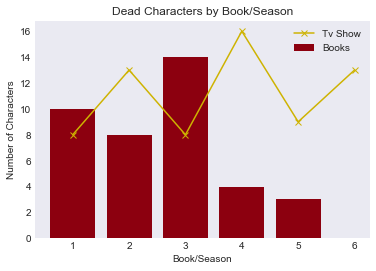

In [77]:
%pylab inline
# Deaths by Book/Season

sns.set_style("darkgrid")
plt.bar(by_book.death_bk, by_book.isdead_shw, color='xkcd:crimson', label="Books")
plt.plot(by_seas.death_season, by_seas.isdead_shw, marker='x', color='xkcd:mustard', label="Tv Show")

plt.title('Dead Characters by Book/Season', fontsize=12)
plt.xlabel('Book/Season', fontsize=10)
plt.ylabel('Number of Characters', fontsize=10)
plt.grid()

plt.legend()

In [78]:
y = got_df['isdead_shw']
x = got_df[['isdead_bk', 'ismale', 'book1', 'book2', 'book3', 'book4', 'book5',
            #'isalivemother_bk', 'isalivefather_bk', 'isaliveheir_bk','isalivespouse_bk', 'ismarried_bk', 
            'isnoble_bk', 'booldeadrelations_bk', 'ispopular_bk', #'death_bk', 'apperance_chp',
            #'hasmom_bk', 'hasdad_bk', 'hasheir_bk', 'hasspouse_bk', 
            'age_bk', 'numdeadrelations_bk', 'popularity_bk', 
            #'culture_bk', 'house_bk', 'name_y', 'isdead_shw', 'death_season', 
            'time_s1', 'time_s2', 'time_s3', 'time_s4', #'total_episode_num', 
            'season1', 'season2', 'season3', 'season4', 'age_shw', #'house_shw', 'match_name',
            #'sum_rating', 'total_viewers',
            'culture_bk[T.Astap]', 'culture_bk[T.Braav]', 'culture_bk[T.Crann]', 'culture_bk[T.Dorni]', 
            'culture_bk[T.Dothr]', 'culture_bk[T.Free ]', 'culture_bk[T.Ghisc]', 'culture_bk[T.Ironb]', 
            'culture_bk[T.Ironm]', 'culture_bk[T.Lhaza]', 'culture_bk[T.Lysen]', 'culture_bk[T.Myris]', 
            'culture_bk[T.Naath]', 'culture_bk[T.None]', 'culture_bk[T.North]', 'culture_bk[T.Pento]', 
            'culture_bk[T.Qarth]', 'culture_bk[T.Reach]', 'culture_bk[T.River]', 'culture_bk[T.Storm]', 
            'culture_bk[T.The R]', 'culture_bk[T.Tyros]', 'culture_bk[T.Valem]', 'culture_bk[T.Valyr]', 
            'culture_bk[T.Weste]', 'culture_bk[T.Wildl]',
            'house_bk[T.BROTHERHOOD WITHOUT BANNERS]', 'house_bk[T.HOUSE ARRYN]', 'house_bk[T.HOUSE BAELISH]', 
            'house_bk[T.HOUSE BARATHEON]', 'house_bk[T.HOUSE BOLTON]', 'house_bk[T.HOUSE CLEGANE]', 
            'house_bk[T.HOUSE FREY]', 'house_bk[T.HOUSE GREYJOY]', 'house_bk[T.HOUSE LANNISTER]', 
            'house_bk[T.HOUSE MARTELL]', 'house_bk[T.HOUSE STARK]', 'house_bk[T.HOUSE TARGARYEN]', 
            'house_bk[T.HOUSE TULLY]', 'house_bk[T.HOUSE TYRELL]', 'house_bk[T.NIGHTS WATCH]', 'house_bk[T.OTHER]', 
            'house_bk[T.UNKNOWN]', 'house_shw[T.House Bolton]', 'house_shw[T.House Greyjoy]', 
            'house_shw[T.House Lannister]', 'house_shw[T.House Stark]', 'house_shw[T.House Targaryen]', 
            'house_shw[T.None]', 'house_shw[T.Nights Watch]']]
len(x)

115

In [79]:
print('Original dataset shape {}'.format(Counter(y)))

Original dataset shape Counter({1: 65, 0: 50})


In [80]:
def plot_PCA_3D(data, target):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    
    pca = decomposition.PCA(n_components=3)
    pca.fit(data)
    pcafeatures = pca.transform(data)

    ax.scatter(pcafeatures[target == 0, 1], pcafeatures[target == 0, 2], pcafeatures[target == 0, 0], c='red', label='Dead', edgecolors="black")
    ax.scatter(pcafeatures[target == 1, 1], pcafeatures[target == 1, 2], pcafeatures[target == 1, 0], c='gray', label='Alive', edgecolors="black")
    
    ax.set_xlabel('1st principle component')
    ax.set_ylabel('2nd principle component')
    ax.set_zlabel('3rd principle component')
    plt.legend()

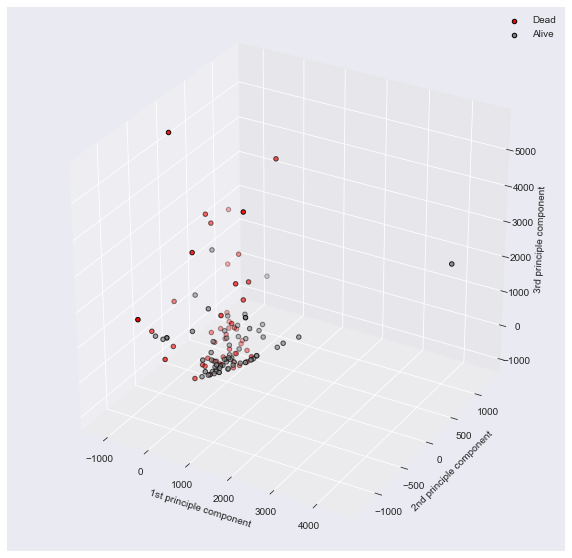

In [81]:
plt.figure(figsize=(20,10))
plot_PCA_3D(x, y)
#plt.savefig('EDA_Scatter_DeadAlive.png')

### Analysis on LEFT JOIN
**All Characters from the books, including those with info from Tv Show**

In [82]:
got_df = pd.read_csv('../csv/SQL_GOT_data.csv')
total = len(got_df)
total

2011

Populating the interactive namespace from numpy and matplotlib


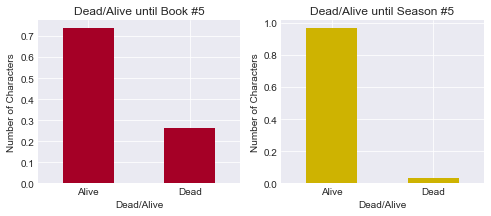

In [83]:
%pylab inline
# General distribution Dead?Alive by books and tv SHow separately

sns.set_style("dark")
plt.figure(figsize=(8,3))

plt.subplot(1, 2, 1)
bars_bk = got_df.groupby('isdead_bk')['isdead_bk'].count()/total
bars_bk.plot(kind="bar", colormap='RdYlBu')

plt.title('Dead/Alive until Book #5', fontsize=12)
plt.xlabel('Dead/Alive', fontsize=10)
plt.ylabel('Number of Characters', fontsize=10)
plt.xticks(range(0,2), ['Alive', 'Dead'], rotation=0)
plt.grid()

plt.subplot(1, 2, 2)
bars_shw = got_df.groupby('isdead_shw')['isdead_shw'].count()/total
bars_shw.plot(kind="bar", color='xkcd:mustard')

plt.title('Dead/Alive until Season #5', fontsize=12)
plt.xlabel('Dead/Alive', fontsize=10)
plt.ylabel('Number of Characters', fontsize=10)
plt.xticks(range(0,2), ['Alive', 'Dead'], rotation=0)
plt.grid()

#plt.savefig('EDA_Bar_DeadAlive.png')

In [84]:
print(got_df.groupby('isdead_shw')['isdead_shw'].count())
print(got_df.groupby('isdead_shw')['isdead_shw'].count()/total)

isdead_shw
0.0    1946
1.0      65
Name: isdead_shw, dtype: int64
isdead_shw
0.0    0.967678
1.0    0.032322
Name: isdead_shw, dtype: float64


In [85]:
by_book = got_df.groupby('death_bk')['isdead_shw'].count().reset_index()
by_seas = got_df.groupby('death_season')['isdead_shw'].count().reset_index()
print(by_book)
print(by_seas)

   death_bk  isdead_shw
0       1.0          49
1       2.0          73
2       3.0          97
3       4.0          27
4       5.0          61
   death_season  isdead_shw
0           1.0           8
1           2.0          13
2           3.0           8
3           4.0          16
4           5.0           9
5           6.0          13


Populating the interactive namespace from numpy and matplotlib


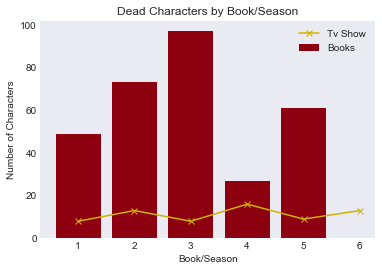

In [86]:
%pylab inline
# Deaths by Book/Season

sns.set_style("darkgrid")
plt.bar(by_book.death_bk, by_book.isdead_shw, color='xkcd:crimson', label="Books")
plt.plot(by_seas.death_season, by_seas.isdead_shw, marker='x', color='xkcd:mustard', label="Tv Show")

plt.title('Dead Characters by Book/Season', fontsize=12)
plt.xlabel('Book/Season', fontsize=10)
plt.ylabel('Number of Characters', fontsize=10)
plt.grid()

plt.legend()

In [87]:
y = got_df['isdead_shw']
x = got_df[['isdead_bk', 'ismale', 'book1', 'book2', 'book3', 'book4', 'book5',
            #'isalivemother_bk', 'isalivefather_bk', 'isaliveheir_bk','isalivespouse_bk', 'ismarried_bk', 
            'isnoble_bk', 'booldeadrelations_bk', 'ispopular_bk', #'death_bk', 'apperance_chp',
            #'hasmom_bk', 'hasdad_bk', 'hasheir_bk', 'hasspouse_bk', 
            'age_bk', 'numdeadrelations_bk', 'popularity_bk', 
            #'culture_bk', 'house_bk', 'name_y', 'isdead_shw', 'death_season', 
            'time_s1', 'time_s2', 'time_s3', 'time_s4', #'total_episode_num', 
            'season1', 'season2', 'season3', 'season4', 'age_shw', #'house_shw', 'match_name',
            'sum_rating', 'total_viewers',
            'culture_bk[T.Astap]', 'culture_bk[T.Braav]', 'culture_bk[T.Crann]', 'culture_bk[T.Dorni]', 
            'culture_bk[T.Dothr]', 'culture_bk[T.Free ]', 'culture_bk[T.Ghisc]', 'culture_bk[T.Ironb]', 
            'culture_bk[T.Ironm]', 'culture_bk[T.Lhaza]', 'culture_bk[T.Lysen]', 'culture_bk[T.Myris]', 
            'culture_bk[T.Naath]', 'culture_bk[T.None]', 'culture_bk[T.North]', 'culture_bk[T.Pento]', 
            'culture_bk[T.Qarth]', 'culture_bk[T.Reach]', 'culture_bk[T.River]', 'culture_bk[T.Storm]', 
            'culture_bk[T.The R]', 'culture_bk[T.Tyros]', 'culture_bk[T.Valem]', 'culture_bk[T.Valyr]', 
            'culture_bk[T.Weste]', 'culture_bk[T.Wildl]',
            'house_bk[T.BROTHERHOOD WITHOUT BANNERS]', 'house_bk[T.HOUSE ARRYN]', 'house_bk[T.HOUSE BAELISH]', 
            'house_bk[T.HOUSE BARATHEON]', 'house_bk[T.HOUSE BOLTON]', 'house_bk[T.HOUSE CLEGANE]', 
            'house_bk[T.HOUSE FREY]', 'house_bk[T.HOUSE GREYJOY]', 'house_bk[T.HOUSE LANNISTER]', 
            'house_bk[T.HOUSE MARTELL]', 'house_bk[T.HOUSE STARK]', 'house_bk[T.HOUSE TARGARYEN]', 
            'house_bk[T.HOUSE TULLY]', 'house_bk[T.HOUSE TYRELL]', 'house_bk[T.NIGHTS WATCH]', 'house_bk[T.OTHER]', 
            'house_bk[T.UNKNOWN]', 'house_shw[T.House Bolton]', 'house_shw[T.House Greyjoy]', 
            'house_shw[T.House Lannister]', 'house_shw[T.House Stark]', 'house_shw[T.House Targaryen]', 
            'house_shw[T.None]', 'house_shw[T.Nights Watch]']]
len(x)

2011

In [88]:
from collections import Counter

print('Original dataset shape {}'.format(Counter(y)))

Original dataset shape Counter({0.0: 1946, 1.0: 65})


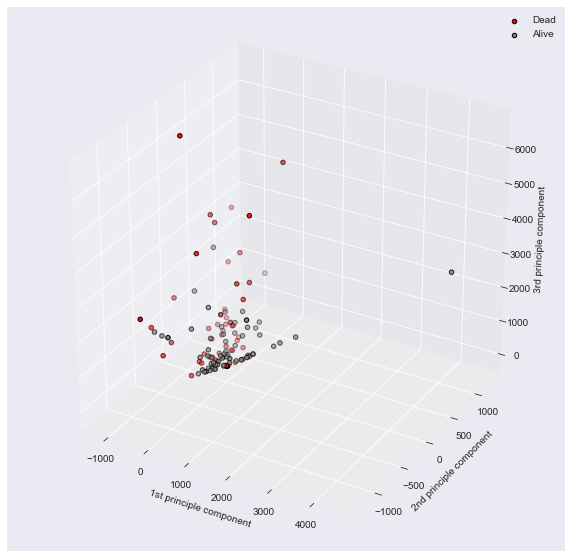

In [89]:
plt.figure(figsize=(20,10))
plot_PCA_3D(x, y)
#plt.savefig('EDA_Scatter_DeadAlive.png')